In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def segmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
def segmoid_derivative(x):
    return x*(1-x)

In [9]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
Y = np.array([[0], [1], [1], [0]]) # Output
w1 = np.random.uniform(-1, 1, (2, 2))
w2 = np.random.uniform(-1, 1, (2, 2))
alpha = 0.1
epochs = 1000

In [10]:
def training(X, w1, w2, alpha, epochs):
    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_input = np.dot(X, w1)
        hidden_layer_output = segmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, w2)
        prediction = segmoid(output_layer_input)
        
        # Backward propagation
        error = Y - prediction
        d_prediction = error * segmoid_derivative(prediction)

        error_hidden_layer = d_prediction.dot(w2.T)
        d_hidden_layer = error_hidden_layer * segmoid_derivative(hidden_layer_output)

        w2 -= hidden_layer_output.T.dot(prediction) * alpha
        w1 -= X.T.dot(d_hidden_layer) * alpha

        return w1, w2, prediction

In [11]:
w1, w2, prediction = training(X, w1, w2, alpha, epochs)
print(prediction)

[[0.56194935 0.47907836]
 [0.57727884 0.49901157]
 [0.56281094 0.46267678]
 [0.57776044 0.48197484]]


In [15]:
def draw_neural_network(weights_input_hidden, weights_hidden_output):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')

    # Neuron positions
    input_neurons = [(0, 0.8), (0, 0.2)]
    hidden_neurons = [(0.5, 1), (0.5, 0.6)]
    output_neurons = [(1, 0.8)]

    # Draw neurons
    for x, y in input_neurons:
        ax.add_artist(plt.Circle((x, y), 0.05, color='blue', fill=True))
    for x, y in hidden_neurons:
        ax.add_artist(plt.Circle((x, y), 0.05, color='green', fill=True))
    for x, y in output_neurons:
        ax.add_artist(plt.Circle((x, y), 0.05, color='red', fill=True))

    # Draw weights input to hidden
    for i, (x1, y1) in enumerate(input_neurons):
        for j, (x2, y2) in enumerate(hidden_neurons):
            ax.plot([x1, x2], [y1, y2], color='gray')
            weight = weights_input_hidden[i][j]
            ax.text((x1 + x2) / 2, (y1 + y2) / 2, f'{weight:.2f}', fontsize=8, color='black')

    # Draw weights hidden to output
    for i, (x1, y1) in enumerate(hidden_neurons):
        for j, (x2, y2) in enumerate(output_neurons):
            ax.plot([x1, x2], [y1, y2], color='gray')
            weight = weights_hidden_output[i][j]
            ax.text((x1 + x2) / 2, (y1 + y2) / 2, f'{weight:.2f}', fontsize=8, color='black')

    # Add labels
    for i, (x, y) in enumerate(input_neurons):
        ax.text(x - 0.1, y, f'Input {i + 1}', fontsize=10)
    for i, (x, y) in enumerate(hidden_neurons):
        ax.text(x + 0.1, y, f'Hidden {i + 1}', fontsize=10)
    ax.text(output_neurons[0][0] + 0.1, output_neurons[0][1], 'Output', fontsize=10)

    plt.title("Neural Network Representation")
    plt.show()

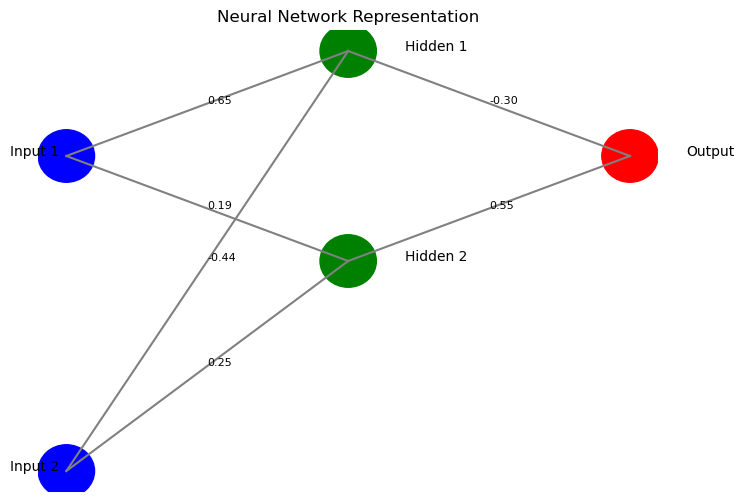

In [16]:
draw_neural_network(w1, w2)